# Kaggle Titanic Challenge
#In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.
This will include:
- exploring the data
- feature engineering
- feature selection
- modeling
- testing

In [1]:
import pandas as pd

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
gender = pd.read_csv('gender_submission.csv')

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


data dictionary
- survived: 0 = no, 1 = yes
- pclass: ticket class 1= 1st, 2 = 2nd, 3 = 3rd
- sibsp: this is the number of siblings or spouses aboard the titanic
- parch: this is the number of parents or children aboard the titanic
- ticket: ticket number
- cabin: cabin number
- embarked: port where the passenger embarked C = cherbourg, Q = Queenstown, S = Southampton

In [4]:
train.shape
#here we have 891 passengers with 12 features

(891, 12)

In [5]:
test.shape
#this won't have the survivor feature. 

(418, 11)

In [6]:
train.info()
#this will show us additional info and allow us to determine if we need to drop NAN values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum()
#how many values are null in each column?

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()  # setting seaborn default for plots

#barchart for categorical features
- Pclass
- Sex
- SibSp(num of siblings and spouses)
- Parch(num of parents and children)
- Embarked
- Cabin

In [16]:
#this will get us one feature and give us two bar charts. so we will have one bar chart for the survived and one bar
#chart for those who did not survive. 
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts() #getting a count of all that survived and naming it
    dead = train[train['Survived']==0][feature].value_counts() #getting a count of all that did not survive and naming it
    df = pd.DataFrame([survived,dead]) #making a dataframe out of both values
    df.index = ['Survived', 'Dead'] #naming the indexes of the dataframe
    df.plot(kind='bar',stacked=True, figsize=(10,5)) #determining the characteristics of the plot. 
    

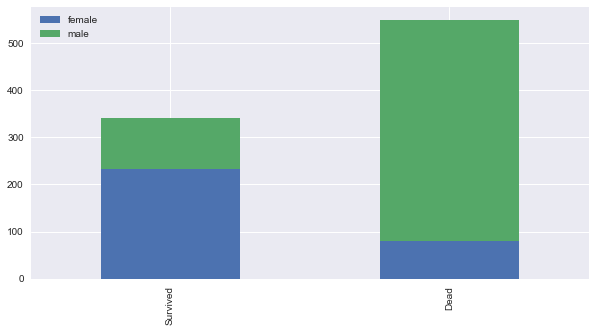

In [17]:
bar_chart('Sex')

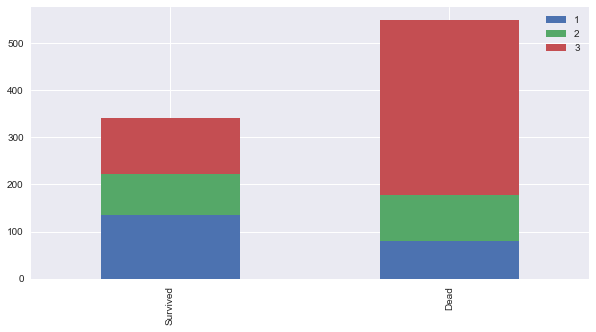

In [18]:
bar_chart('Pclass')

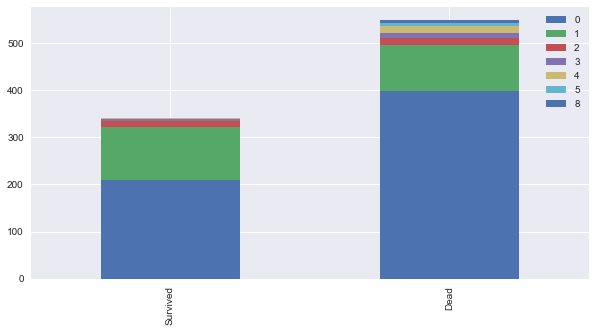

In [19]:
bar_chart('SibSp')

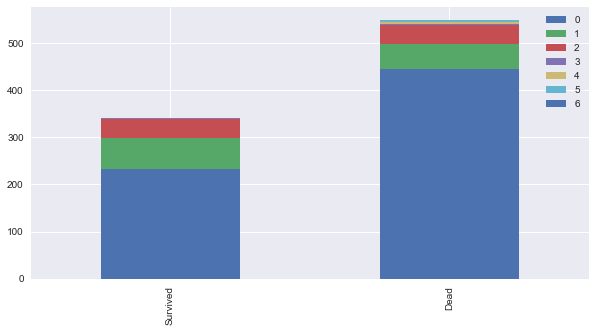

In [20]:
bar_chart('Parch')

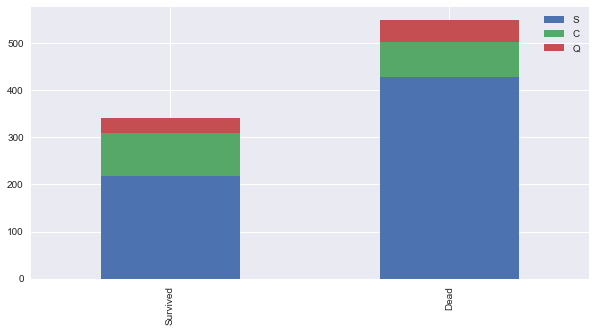

In [21]:
bar_chart('Embarked')

In [23]:
#combining train and test dataset to create a new data set on the Name value. 
#the goal here is to create a data set where we can extract information from mr. and mrs. titles. 
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) #this should retreive strings followed by '.'
    #and puts them into a new column

In [24]:
#looking at the frequency of each value in the new 'titles' column
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Mme           1
Lady          1
Jonkheer      1
Sir           1
Capt          1
Countess      1
Ms            1
Name: Title, dtype: int64

In [25]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

#Here we'll be doing some title mapping. We'll be assigning a number value to each title.
- Mr: 0
- Miss: 1
- Mrs: 2
- Others: 3

In [26]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr":3, "Rev": 3, "Col":3, "Mile": 3, "Countess":3, 
                 "Ms":3, "Lady": 3, "Jonkheer": 3, "Don":3, "Dona": 3, "Mme": 3, "Capt": 3, "Sir": 3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping) #This changes the title column from the literal title to 
    #numerical representation of the title. 

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [28]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


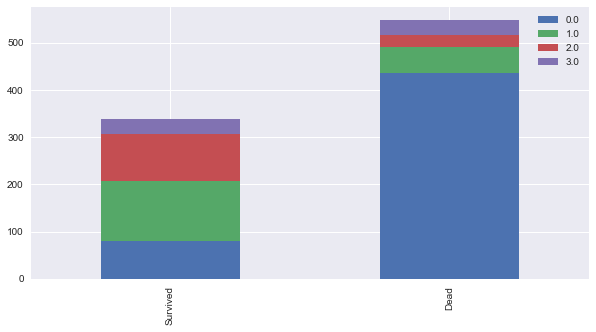

In [29]:
bar_chart('Title')

In [ ]:
# we are removing the name, because it is unnecessary 
train.drop('Name', axis=1, inplace=True)
train.drop('Name', axis=1, inplace=True)

In [30]:
#changing the 'male'  and 'female' values from text to numerical. 
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

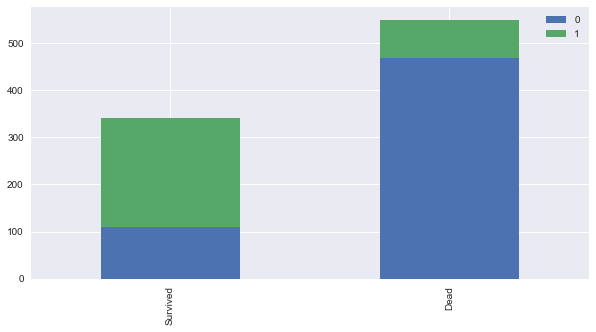

In [31]:
bar_chart('Sex')

In [ ]:
#we have age values missing so we're going to use the median age for missing values using the title
#we will find the average age for each title (mrs, mr) and then we will fill in the missing values accordingly
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

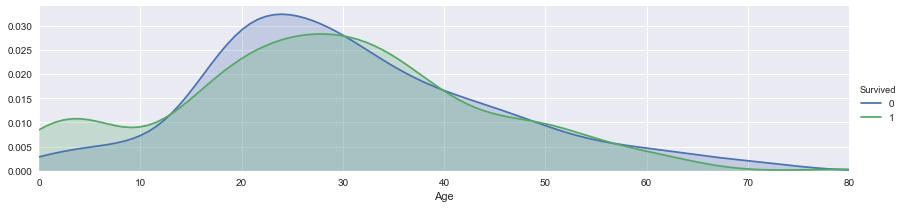

In [32]:
#creating a graph to plot age of survivors and non-survivors
#I'll have to revisit this graph, I don't think everything is right with it. 
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

(0, 20)

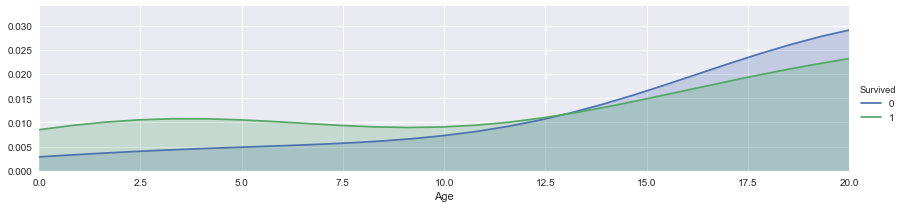

In [33]:
#this is to get a closer look at the people 0 -20 years old. 
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20, 30)

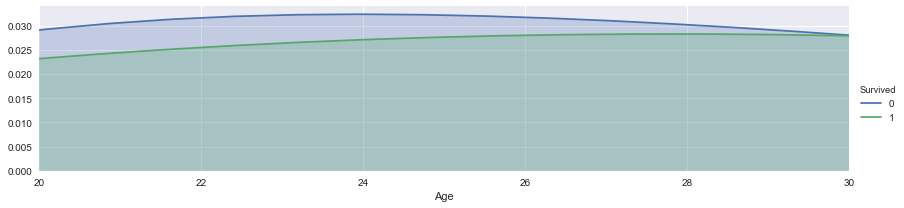

In [35]:
#getting a closer look at ages 20-30
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30, 40)

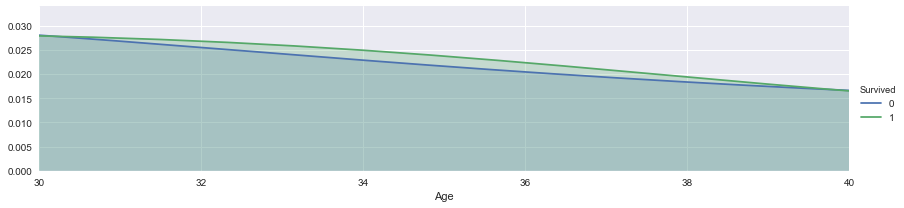

In [36]:
#getting a closer look at ages 30-40
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40, 60)

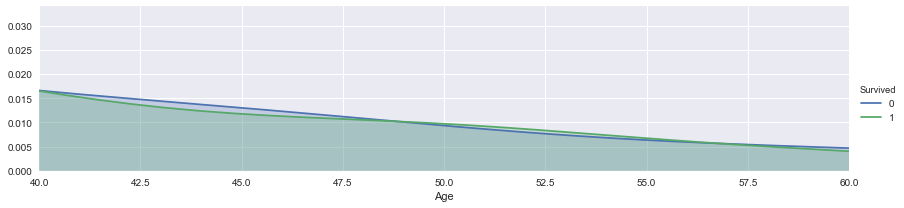

In [37]:
#getting a closer look at ages 40-60
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          887 non-null float64
dtypes: float64(3), int64(6), object(4)
memory usage: 90.6+ KB


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


Here we'll begin binning the Age data into groups to make it a categorical variable

feature vector map:
child: 0
young: 1
adult: 2
mid-age: 3
senior: 4

In [40]:
#we're applying this to each dataset (both train and test). binning the data into age categories and replacing the age variable.
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] =1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] =2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] =3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0.0


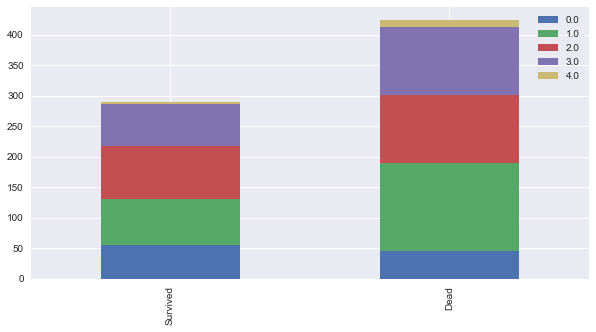

In [43]:
#now the information is easier to view in bar chart form. 
bar_chart('Age')

In [ ]:
#next we will fill embarked's missing values. 
